In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../")

In [3]:
def value_iteration_for_gamblers(p_h, num_states, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        num_actions = min(s, num_states-s)+1
        A = np.zeros((num_states+1))
        
        for a in range(1,num_actions):
            A[a] = p_h*(rewards[s+a] + discount_factor*V[s+a])
            A[a] += (1-p_h)*(rewards[s-a] + discount_factor*V[s-a])
        
        return A
    policy = np.zeros((num_states+1))
    V = np.zeros((num_states+1))
    rewards = np.zeros((num_states+1))
    rewards[num_states] = 1
    
    while True:
        delta = 0
        
        for s in range(num_states+1):
            v = V[s]
            actions = one_step_lookahead(s, V, rewards)
            V[s] = np.amax(actions)
            
            delta = max(delta, abs(v - V[s]))
        
        if delta < theta:
            break
            
    for s in range(num_states+1):
        actions = one_step_lookahead(s, V, rewards)
        policy[s] = np.argmax(actions)
    
    return policy, V

In [4]:
num_states = 100

In [5]:
policy, v = value_iteration_for_gamblers(0.1,num_states)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

Optimized Policy:
[ 0.  0.  2.  3.  4.  5.  6.  6.  8.  9. 10. 11. 12. 13. 14. 15.  3.  8.
 18.  6.  5.  4.  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 39. 40. 41.  8.  7. 44. 45.  4. 47. 48.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.  8.  7. 19. 20.  4.
 22.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]

Optimized Value Function:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e-05 1.90000000e-05 3.43900000e-05 1.00000000e-04
 1.09000000e-04 1.24390000e-04 1.90000000e-04 2.71000000e-04
 3.50461000e-04 1.00000000e-03 1.00000000e-03 1.01710000e-03
 1.09000000e-03 1.11195100e-03 1.24390000e-03 1.90000000e-03
 1.91539000e-03 2.00075590e-03 2.71000000e-03 2.80068031e-03
 3.52061228e-03 1.00000000e-02 1.00000000e-02 1.00090000e-02
 1.00309510e-02 1.00981000e-02 1.01710000e-02 1.03154149e-02
 1.09000000e-02 1.09810000e-02 1.11195100e-02 1.17238510

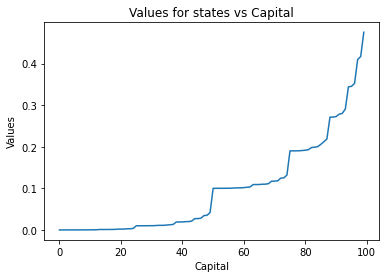

In [6]:
# Plotting Final Policy (action stake) vs State (Capital)
x = range(num_states)
y = v[:num_states]

plt.plot(x,y)
plt.xlabel('Capital')
plt.ylabel('Values')
plt.title('Values for states vs Capital')
plt.show()
# Implement!

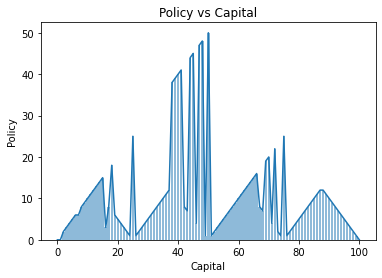

In [7]:
# Plotting Capital vs Final Policy
x = range(num_states+1)
y = policy

plt.plot(x,y)
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Policy')
plt.title('Policy vs Capital')
plt.show()

# Implement!

565